<a href="https://colab.research.google.com/github/kacsar11/Uczenie_maszynowe/blob/ZAD_1/CASE_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
credit_card = '/content/sample_data/creditcard.csv'
df = pd.read_csv(credit_card)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
value_counts = df['Class'].value_counts()
print(value_counts)

0.0    25749
1.0       88
Name: Class, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

In [ ]:
df_cleaned = df.dropna()

In [35]:
X = df_cleaned.drop(columns='Class')
y = df_cleaned['Class']

In [32]:
X_train, X_test = train_test_split(X,test_size=0.33, random_state=42)
y_train, y_test = train_test_split(y,test_size=0.33, random_state=42)

In [33]:
print(X_train.shape, X_test.shape)

(17310, 30) (8527, 30)


In [34]:
print(y_train.shape, y_test.shape)

(17310,) (8527,)


In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

confusion_matrix(y_test, y_pred)

Accuracy: 0.9968335874281693
Precision: 1.0
Recall: 0.1


array([[8497,    0],
       [  27,    3]])

In [54]:
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

In [52]:
oversampler = RandomOverSampler(random_state=42)
X_oversamp, y_oversamp = oversampler.fit_resample(X_train, y_train)
df_oversamp = pd.concat([y_oversamp, X_oversamp], axis=1)

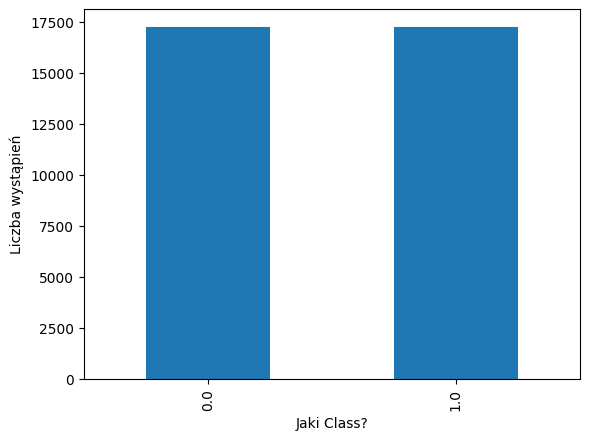

In [55]:
df_oversamp['Class'].value_counts().plot(kind= 'bar')
plt.xlabel("Jaki Class?")
plt.ylabel("Liczba wystąpień");

In [62]:
X_o = df_oversamp.drop(columns='Class')
y_o = df_oversamp['Class']

In [63]:
X_train_o, X_test_o = train_test_split(X_o,test_size=0.33, random_state=42)
y_train_o, y_test_o = train_test_split(y_o,test_size=0.33, random_state=42)

In [68]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_o, y_o)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

confusion_matrix(y_test, y_pred)

Accuracy: 0.9961299401899848
Precision: 0.38461538461538464
Recall: 0.16666666666666666


array([[8489,    8],
       [  25,    5]])